--- Analysis of 'Steady' rank Series ---
slope               : 0.5028
intercept           : 99.6544
r_squared           : 0.9848
std_dev_returns     : 0.0213
max_abs_residual    : 5.1001
penalty_score       : 0.0003

--- Analysis of 'Jumpy' rank Series ---
slope               : 0.5184
intercept           : 102.1333
r_squared           : 0.7228
std_dev_returns     : 0.0393
max_abs_residual    : 30.5673
penalty_score       : 0.0109


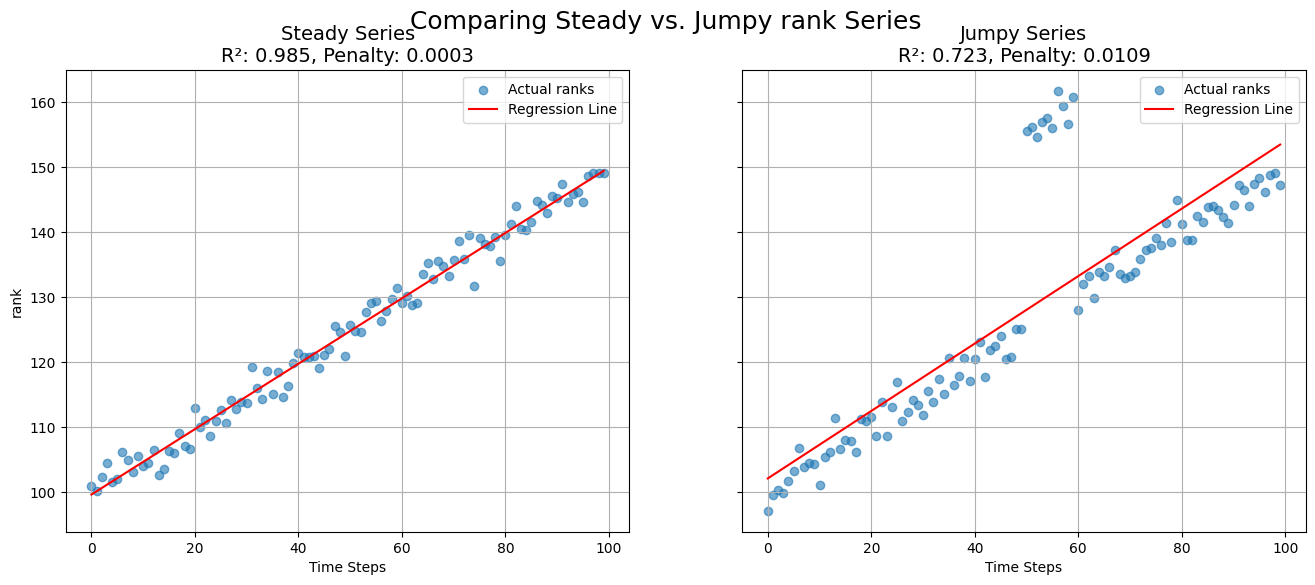

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

def analyze_rank_series(ranks: np.ndarray):
    """
    Performs linear regression on a rank series and calculates metrics
    to quantify its steadiness and volatility.

    Args:
        ranks (np.ndarray): A 1D array of ranks.

    Returns:
        dict: A dictionary containing key metrics about the series.
    """
    if len(ranks) < 2:
        return None # Not enough data to perform regression

    # Create the time-step variable (x-axis)
    time_steps = np.arange(len(ranks))

    # --- Perform Linear Regression using SciPy (fast and efficient) ---
    slope, intercept, r_value, p_value, std_err = stats.linregress(time_steps, ranks)
    
    # --- Calculate Key Metrics ---
    
    # 1. R-squared: The primary measure of "steadiness" or linearity
    r_squared = r_value**2

    # 2. Predicted values and residuals
    predicted_ranks = intercept + slope * time_steps
    residuals = ranks - predicted_ranks

    # 3. Maximum Absolute Residual: The single biggest jump from the trend
    max_abs_residual = np.max(np.abs(residuals))

    # 4. Standard Deviation of Returns: The primary measure of "jumpiness"
    # Use pandas for a convenient way to calculate percentage change
    returns = pd.Series(ranks).pct_change().dropna()
    std_dev_returns = returns.std()
    
    # 5. Create a combined penalty score (example)
    # A higher score means more penalty (less desirable series)
    # We use (1 - r_squared) because a high r_squared is good.
    # We add a small epsilon to avoid division by zero if std_dev is 0.
    penalty_score = (1 - r_squared) * (std_dev_returns + 1e-9)

    return {
        "slope": slope,
        "intercept": intercept,
        "r_squared": r_squared,
        "std_dev_returns": std_dev_returns,
        "max_abs_residual": max_abs_residual,
        "penalty_score": penalty_score,
        "predicted_ranks": predicted_ranks # For plotting
    }

# --- Example Usage ---

# 1. Create a "steady" rank series: linear trend + small noise
np.random.seed(42)
time = np.arange(100)
steady_series = 100 + 0.5 * time + np.random.randn(100) * 2

# 2. Create a "jumpy" rank series: same trend but with a large jump
jumpy_series = 100 + 0.5 * time + np.random.randn(100) * 2
jumpy_series[50:60] += 30 # Add a sudden, large jump

# 3. Analyze both series using our function
steady_analysis = analyze_rank_series(steady_series)
jumpy_analysis = analyze_rank_series(jumpy_series)

# 4. Print and compare the results
print("--- Analysis of 'Steady' rank Series ---")
for key, val in steady_analysis.items():
    if key != 'predicted_ranks':
        print(f"{key:<20}: {val:.4f}")

print("\n--- Analysis of 'Jumpy' rank Series ---")
for key, val in jumpy_analysis.items():
    if key != 'predicted_ranks':
        print(f"{key:<20}: {val:.4f}")

# Notice the key differences:
# - The 'jumpy' series has a much lower R-squared.
# - Its std_dev_returns and max_abs_residual are significantly higher.
# - The final 'penalty_score' is much higher for the jumpy series.

# 5. Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for steady series
ax1.scatter(time, steady_series, label='Actual ranks', alpha=0.6)
ax1.plot(time, steady_analysis['predicted_ranks'], color='red', label='Regression Line')
ax1.set_title(f"Steady Series\nR²: {steady_analysis['r_squared']:.3f}, Penalty: {steady_analysis['penalty_score']:.4f}", fontsize=14)
ax1.set_xlabel("Time Steps")
ax1.set_ylabel("rank")
ax1.legend()
ax1.grid(True)

# Plot for jumpy series
ax2.scatter(time, jumpy_series, label='Actual ranks', alpha=0.6)
ax2.plot(time, jumpy_analysis['predicted_ranks'], color='red', label='Regression Line')
ax2.set_title(f"Jumpy Series\nR²: {jumpy_analysis['r_squared']:.3f}, Penalty: {jumpy_analysis['penalty_score']:.4f}", fontsize=14)
ax2.set_xlabel("Time Steps")
ax2.legend()
ax2.grid(True)

plt.suptitle("Comparing Steady vs. Jumpy rank Series", fontsize=18)
plt.show()

--- Comparison of R-squared ---
Dataset A (Tight Deviation) R-squared: 0.9489
Dataset B (Wide Deviation)  R-squared: 0.5100


<function matplotlib.pyplot.show(close=None, block=None)>

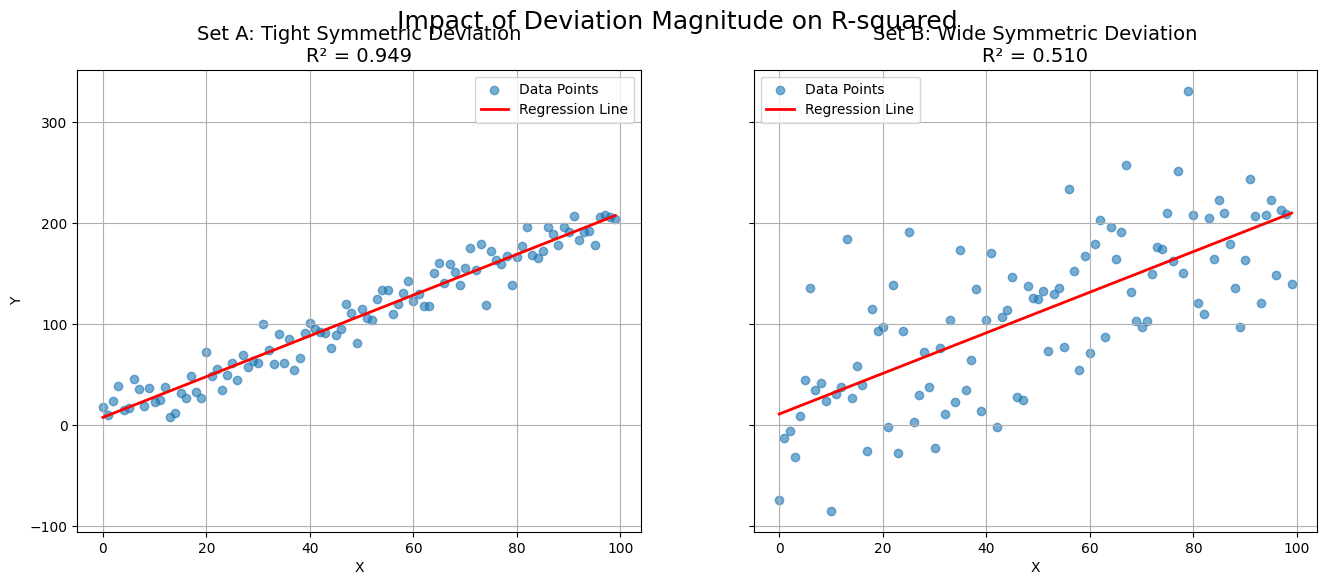

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- 1. Define the Underlying Trend ---
np.random.seed(42)
X = np.arange(100).reshape(-1, 1)
# The true line is y = 10 + 2*x
true_y = 10 + 2 * X

# --- 2. Create Two Datasets ---

# Dataset A: TIGHT symmetric deviation
# Noise from a normal distribution with standard deviation = 15
noise_A = np.random.normal(0, 15, size=(100, 1))
y_A = true_y + noise_A

# Dataset B: WIDE symmetric deviation
# Noise from a normal distribution with standard deviation = 60 (4x larger)
noise_B = np.random.normal(0, 60, size=(100, 1))
y_B = true_y + noise_B


# --- 3. Perform Linear Regression on Both ---

# Model for Set A
model_A = LinearRegression()
model_A.fit(X, y_A)
r_squared_A = model_A.score(X, y_A)
y_pred_A = model_A.predict(X)

# Model for Set B
model_B = LinearRegression()
model_B.fit(X, y_B)
r_squared_B = model_B.score(X, y_B)
y_pred_B = model_B.predict(X)

# --- 4. Print Results ---
print(f"--- Comparison of R-squared ---")
print(f"Dataset A (Tight Deviation) R-squared: {r_squared_A:.4f}")
print(f"Dataset B (Wide Deviation)  R-squared: {r_squared_B:.4f}")


# --- 5. Visualize the Difference ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for Set A
ax1.scatter(X, y_A, alpha=0.6, label='Data Points')
ax1.plot(X, y_pred_A, color='red', linewidth=2, label='Regression Line')
ax1.set_title(f"Set A: Tight Symmetric Deviation\nR² = {r_squared_A:.3f}", fontsize=14)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.legend()
ax1.grid(True)

# Plot for Set B
ax2.scatter(X, y_B, alpha=0.6, label='Data Points')
ax2.plot(X, y_pred_B, color='red', linewidth=2, label='Regression Line')
ax2.set_title(f"Set B: Wide Symmetric Deviation\nR² = {r_squared_B:.3f}", fontsize=14)
ax2.set_xlabel("X")
ax2.legend()
ax2.grid(True)

plt.suptitle("Impact of Deviation Magnitude on R-squared", fontsize=18)
plt.show

R-squared asks: "How much of the price variation is explained by a straight line?"  
The Penalty Score asks: "How linear is the trend and how smooth was the journey?"

Metric               | Smooth Series   | Jagged Series  
-------------------------------------------------------
R-squared            | 0.9997          | 0.8074
Std Dev of Returns   | 0.0053          | 0.1722
Penalty Score        | 0.0537          | 1.9142


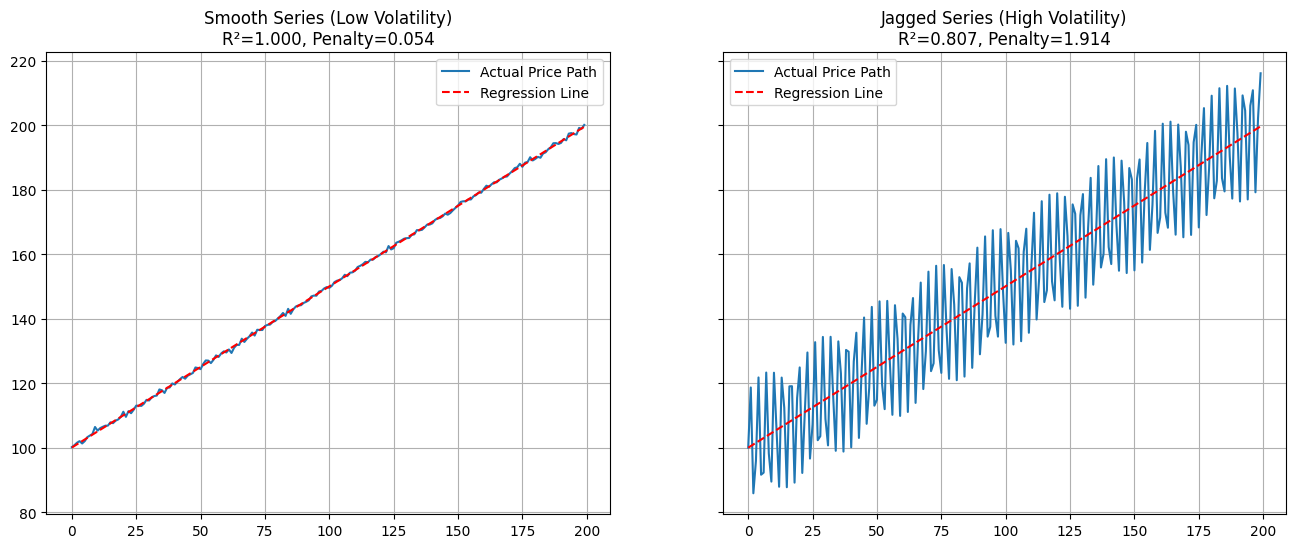

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Re-using the analysis function from before
def analyze_price_series(prices: np.ndarray):
    time_steps = np.arange(len(prices))
    slope, intercept, r_value, _, _ = stats.linregress(time_steps, prices)
    r_squared = r_value**2
    predicted_prices = intercept + slope * time_steps
    returns = pd.Series(prices).pct_change().dropna()
    std_dev_returns = returns.std()
    
    # We will use a slightly modified penalty score to make the effect more pronounced
    # By adding 1 to std_dev_returns, we ensure it's never zero and has a baseline
    penalty_score = (1 - r_squared) + (std_dev_returns * 10) # Weighted more on volatility

    return {
        "r_squared": r_squared,
        "std_dev_returns": std_dev_returns,
        "penalty_score": penalty_score,
        "predicted_prices": predicted_prices
    }

# --- Create the Two Datasets ---
time = np.arange(200)
# Both have the same underlying linear trend
base_trend = 100 + 0.5 * time

# 1. Smooth Series: The ideal steady gainer
y_smooth = base_trend + np.random.randn(200) * 0.5

# 2. Jagged Series: Same trend, but with high-frequency volatility (a sine wave)
# This series zigs and zags wildly but always comes back to the trend line.
y_jagged = base_trend + 20 * np.sin(time * 2) 

# --- Analyze and Compare ---
smooth_analysis = analyze_price_series(y_smooth)
jagged_analysis = analyze_price_series(y_jagged)

print(f"{'Metric':<20} | {'Smooth Series':<15} | {'Jagged Series':<15}")
print("-" * 55)
print(f"{'R-squared':<20} | {smooth_analysis['r_squared']:.4f}          | {jagged_analysis['r_squared']:.4f}")
print(f"{'Std Dev of Returns':<20} | {smooth_analysis['std_dev_returns']:.4f}          | {jagged_analysis['std_dev_returns']:.4f}")
print(f"{'Penalty Score':<20} | {smooth_analysis['penalty_score']:.4f}          | {jagged_analysis['penalty_score']:.4f}")


# --- Visualize the Results ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for smooth series
ax1.plot(time, y_smooth, label='Actual Price Path')
ax1.plot(time, smooth_analysis['predicted_prices'], 'r--', label='Regression Line')
ax1.set_title(f"Smooth Series (Low Volatility)\nR²={smooth_analysis['r_squared']:.3f}, Penalty={smooth_analysis['penalty_score']:.3f}")
ax1.legend()
ax1.grid(True)

# Plot for jagged series
ax2.plot(time, y_jagged, label='Actual Price Path')
ax2.plot(time, jagged_analysis['predicted_prices'], 'r--', label='Regression Line')
ax2.set_title(f"Jagged Series (High Volatility)\nR²={jagged_analysis['r_squared']:.3f}, Penalty={jagged_analysis['penalty_score']:.3f}")
ax2.legend()
ax2.grid(True)

plt.show()

In [9]:
min(np.random.randn(200))

-2.4238793266289567